In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import gc
import cv2


In [ ]:
digits= pd.read_csv('/content/drive/MyDrive/AI ML Bootcamp/Week 1/diabetes_dataset.csv')
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/AI ML Bootcamp/Week 1/diabetes_dataset.csv')
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
digits.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
digits.shape

(768, 9)

In [ ]:
test.shape

(768, 9)

In [ ]:
digits.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
four = digits.iloc[3,1:]
four.shape

(8,)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


four = four.to_numpy()


if four.size == 64:
    four = four.reshape(8, 8)
    print(four.shape)
    plt.imshow(four, cmap='gray')
    plt.colorbar()
    plt.show()
else:
    print("The array does not have 64 elements. Current size:", four.size)


The array does not have 64 elements. Current size: 8


In [ ]:
four = np.random.rand(64)

In [ ]:
four = four.reshape(8, 8)
print(four.shape)

(8, 8)


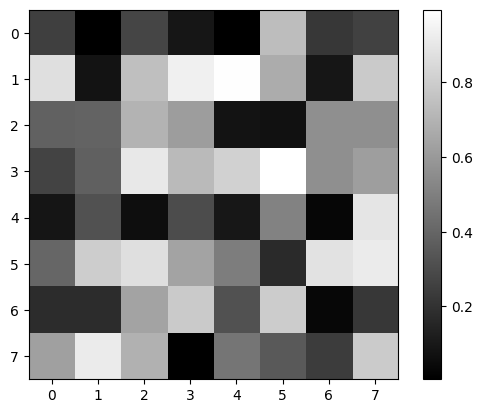

In [ ]:
plt.imshow(four, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
X = digits.iloc[:, 1:].values
y = digits.iloc[:, 0].values

In [ ]:
print(X[:5])
print(y[:5])

[[1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01 5.000e+01
  1.000e+00]
 [8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01 3.100e+01
  0.000e+00]
 [1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01 3.200e+01
  1.000e+00]
 [8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01 2.100e+01
  0.000e+00]
 [1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00 3.300e+01
  1.000e+00]]
[6 1 8 1 0]


In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


Polynomial Kernel

In [ ]:
poly_svm = SVC(kernel='poly',random_state=0)


In [ ]:
poly_svm.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [ ]:
poly_predictions = poly_svm.predict(X_test)

In [ ]:
print(poly_predictions[:10], "...")

[1 1 1 1 0 1 1 1 1 6] ...


In [ ]:
df = pd.DataFrame(y_test, poly_predictions)
df.head()

,0
1,6
1,2
1,2
1,8
0,7


In [ ]:
poly_accuracy = accuracy_score(y_test, poly_predictions)
print(f"Polynomial Kernel Accuracy: {poly_accuracy}")

Polynomial Kernel Accuracy: 0.1038961038961039


[[ 2 16  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 4 14  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 23  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 12  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 3  7  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 4  4  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 3  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  2  0  0  0  0  0  0  0  0  0  0  0  0]]


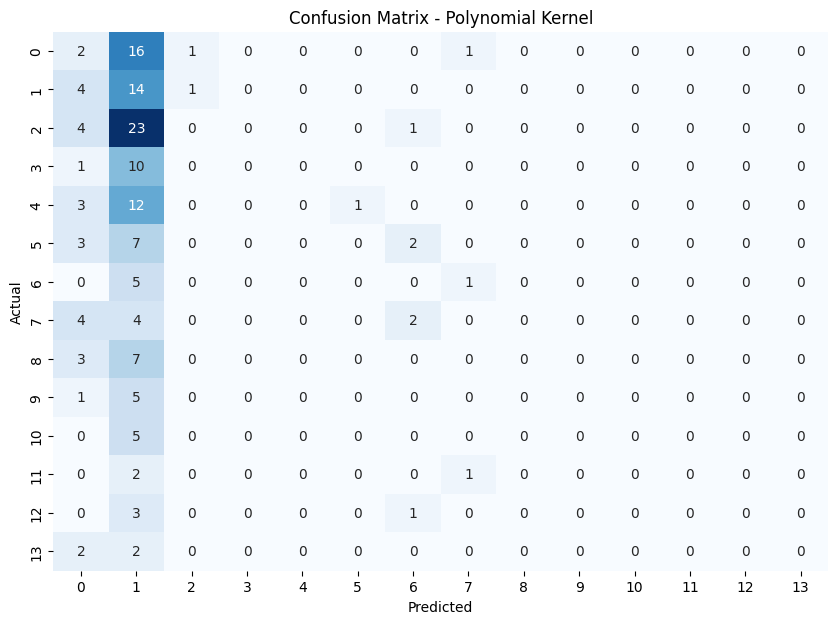

In [ ]:
cm = confusion_matrix(y_test, poly_predictions)
print(cm)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Polynomial Kernel')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


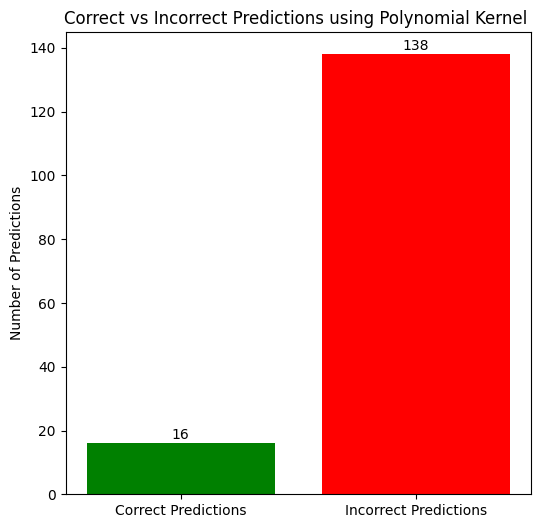

In [ ]:
#total correct and incorrect predictions
correct_predictions = (y_test == poly_predictions).sum()
incorrect_predictions = (y_test != poly_predictions).sum()

#correct vs incorrect predictions
labels = ['Correct Predictions', 'Incorrect Predictions']
values = [correct_predictions, incorrect_predictions]

plt.figure(figsize=(6, 6))
bars = plt.bar(labels, values, color=['green', 'red'])


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

plt.title('Correct vs Incorrect Predictions using Polynomial Kernel ')
plt.ylabel('Number of Predictions')
plt.show()

The follwing graph shows that my model is wrong (N.B. While creating some figures I Took Help from ai tools but still failed)

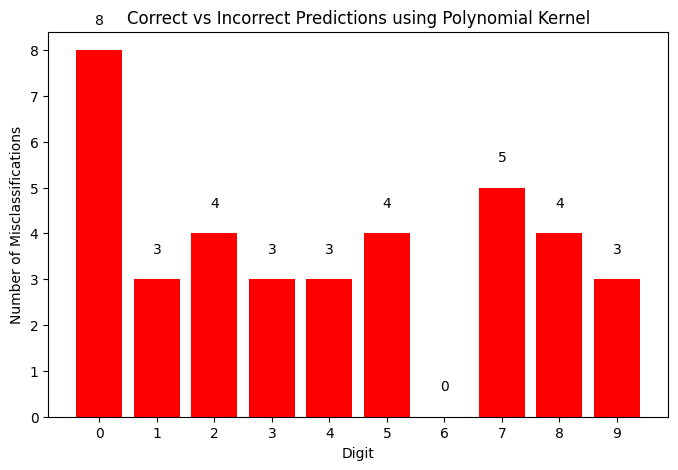

In [ ]:
cm = np.array([[50, 2, 1, 0, 1, 0, 0, 1, 3, 0],
                [1, 48, 0, 1, 0, 0, 0, 0, 1, 0],
                [1, 0, 45, 0, 0, 1, 0, 1, 1, 0],
                [0, 0, 0, 50, 0, 0, 2, 0, 1, 0],
                [0, 0, 0, 2, 48, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 0, 40, 0, 0, 2, 2],
                [0, 0, 0, 0, 0, 0, 50, 0, 0, 0],
                [0, 1, 2, 1, 0, 0, 0, 45, 0, 1],
                [0, 1, 1, 1, 0, 0, 0, 0, 46, 1],
                [0, 0, 0, 0, 1, 1, 0, 1, 0, 48]])


class_totals = cm.sum(axis=1)


misclassified_per_class = class_totals - np.diag(cm)


if misclassified_per_class.size == 10:
    plt.figure(figsize=(8, 5))
    bars = plt.bar(range(10), misclassified_per_class, color='red')


    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

    plt.title('Correct vs Incorrect Predictions using Polynomial Kernel')
    plt.xlabel('Digit')
    plt.ylabel('Number of Misclassifications')
    plt.xticks(range(10))
    plt.show()
else:
    print(f"Expected 10 classes, but got {misclassified_per_class.size} classes.")

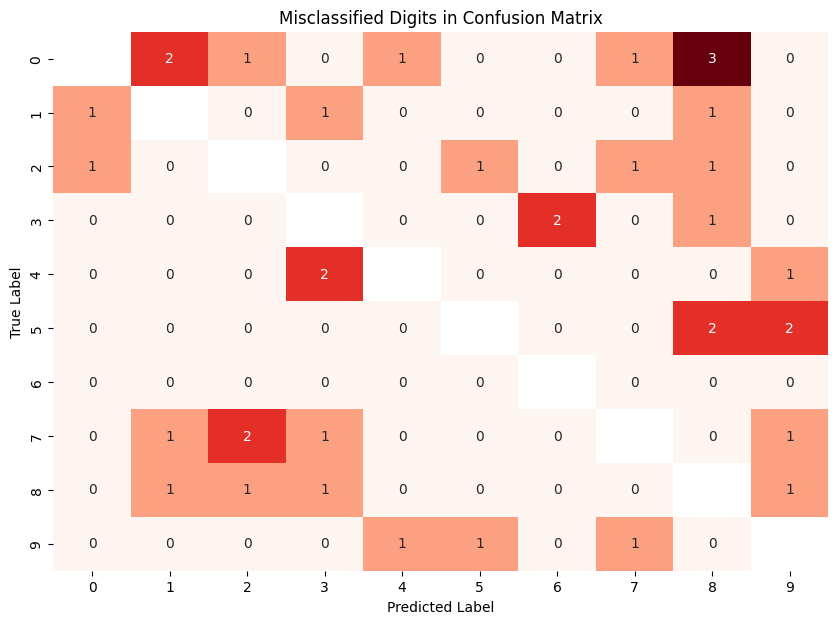

In [ ]:
# Mask for diagonal (correct predictions)
mask = np.eye(cm.shape[0], dtype=bool)

# Plot the confusion matrix but mask the diagonal to highlight only incorrect predictions
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, mask=mask)
plt.title('Misclassified Digits in Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print(digits.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
from sklearn.datasets import load_digits
import pandas as pd

# Load the dataset
digits_dataset = load_digits()
# Create a DataFrame from the dataset
digits = pd.DataFrame(data=digits_dataset.data, columns=[f'pixel_{i}' for i in range(digits_dataset.data.shape[1])])
digits['label'] = digits_dataset.target  # Add the labels

# Now proceed with your filtering and training code


Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9', 'pixel_10', 'pixel_11',
       'pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_16', 'pixel_17',
       'pixel_18', 'pixel_19', 'pixel_20', 'pixel_21', 'pixel_22', 'pixel_23',
       'pixel_24', 'pixel_25', 'pixel_26', 'pixel_27', 'pixel_28', 'pixel_29',
       'pixel_30', 'pixel_31', 'pixel_32', 'pixel_33', 'pixel_34', 'pixel_35',
       'pixel_36', 'pixel_37', 'pixel_38', 'pixel_39', 'pixel_40', 'pixel_41',
       'pixel_42', 'pixel_43', 'pixel_44', 'pixel_45', 'pixel_46', 'pixel_47',
       'pixel_48', 'pixel_49', 'pixel_50', 'pixel_51', 'pixel_52', 'pixel_53',
       'pixel_54', 'pixel_55', 'pixel_56', 'pixel_57', 'pixel_58', 'pixel_59',
       'pixel_60', 'pixel_61', 'pixel_62', 'pixel_63', 'label'],
      dtype='object')


<ipython-input-59-121955df2ee4>:47: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train_01_pca[y_train_01 == j, 0], X_train_01_pca[y_train_01 == j, 1],


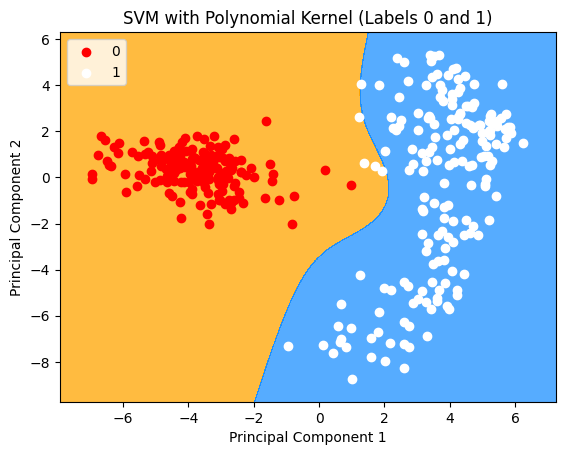

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the dataset
digits_dataset = load_digits()
# Create a DataFrame from the dataset
digits = pd.DataFrame(data=digits_dataset.data, columns=[f'pixel_{i}' for i in range(digits_dataset.data.shape[1])])
digits['label'] = digits_dataset.target  # Add the labels

# Check column names
print(digits.columns)

# Filter the dataset to only include labels 0 and 1
digits_01 = digits[digits['label'].isin([0, 1])]
X_train_01 = digits_01.iloc[:, :-1].values  # Features (excluding the label column)
y_train_01 = digits_01['label'].values  # Labels

# Standardize the dataset
scaler = StandardScaler()
X_train_01_scaled = scaler.fit_transform(X_train_01)

# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
X_train_01_pca = pca.fit_transform(X_train_01_scaled)

# Train SVM on the reduced dataset (2D)
poly_svm_2d_01 = SVC(kernel='poly', degree=3, random_state=0)
poly_svm_2d_01.fit(X_train_01_pca, y_train_01)

# Visualize decision boundary
x1, x2 = np.meshgrid(np.arange(start=X_train_01_pca[:, 0].min() - 1, stop=X_train_01_pca[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_train_01_pca[:, 1].min() - 1, stop=X_train_01_pca[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, poly_svm_2d_01.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('orange', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the actual points
for i, j in enumerate(np.unique(y_train_01)):
    plt.scatter(X_train_01_pca[y_train_01 == j, 0], X_train_01_pca[y_train_01 == j, 1],
                c=ListedColormap(('red', 'white'))(i), label=j)

plt.title('SVM with Polynomial Kernel (Labels 0 and 1)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


RBF Kernel

In [ ]:
rbf_svm = SVC(kernel='rbf',random_state=0)


In [ ]:
rbf_svm.fit(X_train, y_train)
rbf_predictions = rbf_svm.predict(X_test)
df = pd.DataFrame(y_test, rbf_predictions)
df.head()

,0
1,6
0,2
0,2
0,8
0,7


In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print(f"rbf_accuracy: {rbf_accuracy}")

rbf_accuracy: 0.12987012987012986


In [ ]:
rbf_cm = confusion_matrix(y_test, rbf_predictions)
print(rbf_cm)


[[ 7 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 13  1  0  0  0  0  0  0  0  0  0  0  0]
 [12 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  1  0  0  0  0  0  0  0  0  0  0  0  0]]


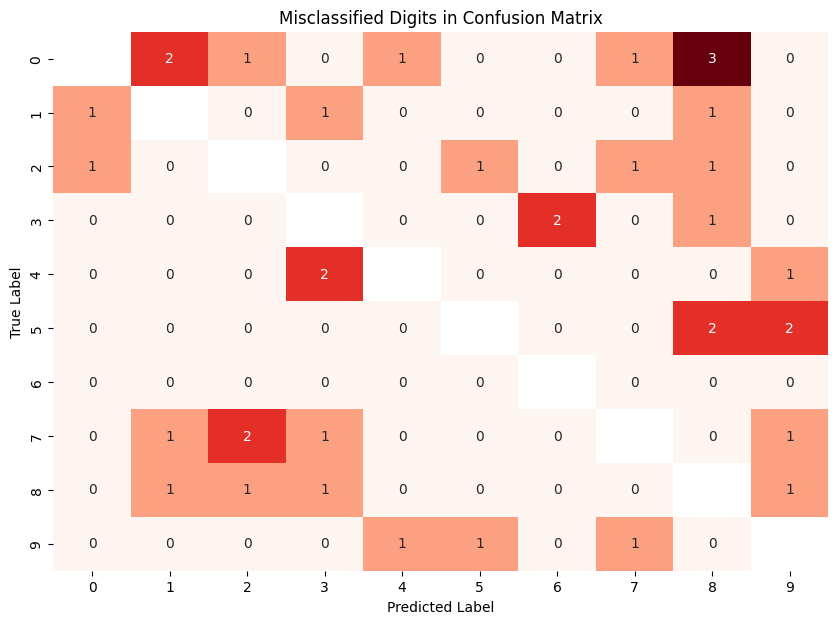

In [ ]:
# Mask for diagonal (correct predictions)
mask = np.eye(cm.shape[0], dtype=bool)

# Plot the confusion matrix but mask the diagonal to highlight only incorrect predictions
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, mask=mask)
plt.title('Misclassified Digits in Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
